<a href="https://colab.research.google.com/github/nickstone1911/data-analysis-practice/blob/main/SVC_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ABA: Lesson 06 Practice Exercises

In this lesson we practice the concepts introduced in: `Python Lesson 26: Intro to Support Vector Machines`
1. Introduce the basics of the `SVC` classifier in `scikit-learn`, a popular machine learning classifier
2. Examine features and capabilities of `SVC`
3. Learn how to install and import the `SCV` classifier
4. Fit a suppor vector classifier to data
5. Examine support vectors and coefficients produced by the SVC model to determine features that are most influential
---

Resources:
>- [SVM Slides](https://docs.google.com/presentation/d/1Kt5oCx5aXmAclnykO8a9ch3IGXiZ44kyHmIlJh2hQpg/edit?usp=sharing)
>- https://scikit-learn.org/stable/modules/svm.html#svc

>- https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

---

# Section 0


## 0.1 Notebook Setup
>- First, we need to authenticate in Colab in order to use Google Cloud services in our notebook
>- If you are going to be working with files in your Google Drive folder(s) you will need to mount your Google drive as well
>- Then we import standard data science libraries
>>- pandas, numpy, seaborn, matplotlib

Authenticate

In [ ]:
from google.colab import auth
auth.authenticate_user()

Mount Your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Change your working directory (if needed)

In [ ]:
import os
os.chdir('/content/drive/MyDrive/BAIM4205')
os.getcwd()

'/content/drive/MyDrive/BAIM4205'

Load Common Data Science Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 0.2: Load Data
For this exercise we are going to use the [wine_fraud.csv](https://drive.google.com/file/d/19CN_jC9Xhf0ZcgCXtJjKNXHDYp0veSfn/view?usp=sharing) file.

>- Download/move the file to your working directory (either MyDrive or your local directory)
>- Load the file into a pandas dataframe named, `wine`

`Canvas Question`: How many rows and columns are in the `wine.csv` dataset?





In [ ]:
wine = pd.read_csv('wine_fraud.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [ ]:
wine.shape

(6497, 13)

## Case Study Data Description

## Business Understanding

## Fraud in Wine

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.

![Wine Fraud](https://drive.google.com/uc?id=1LpHtIu6z23RZLzTaGFA3tlo4WmW7m_-z)


---

Data Source:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


---
---



# Section 1: Data Understanding

## Exploratory Data Analysis and Visualization

In this section, the problems take you through a series of descriptive/exploratory tasks.

## 1.1: What are the class value distributions (relative frequencies) of the target variable?
>- What is the target variable? Have you examined the case description and sampled the data to have a clear idea of what the target is? If not, go back, read the case, sample some data, and figure out what the target is.

In the next code cell, show the classes of the target variable and the frequency of cases in each class rounded to 3 decimals. Enter your data in the format of: `0.XXX`

In [ ]:
wine.value_counts('quality', normalize=True)

quality
Legit    0.962136
Fraud    0.037864
dtype: float64

## 1.2: What are the descriptive analytics for each numeric column in the `wine` DataFrame?

>- Show the feature names as the rows and the descriptive analytics given by `describe()` as the columns. The table below shows a few records and stats to show you how your results should look.
>- Round calculations to two decimals
>- Enter all but whole numbers (e.g., counts, min, max) using two decimals even with trailing zeros, enter 10.10 not 10.1)

### Sample Output
| feature 	| count 	| mean  	| ... 	|
|---------	|-------	|-------	|-----	|
| feature1     	| 303   	| 54.37 	| ... 	|
| feature2     	|       	|       	| ... 	|
| feature3      	|       	|       	| ... 	|

In [ ]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


## 1.3: Show the cases in each class of the target variable in a bar plot.

In the next code cell, write the code to generate the bar plot that shows the count of cases in each of the target classes.

## 1.4: Does there appear to be a difference in fraud between red and white wines?

In the next code cell, show a cross tabulation of the relative frequencies of the types of wine versus the target classes.

>- Round to two decimals
>- Include the preceeding 0. For example, enter `0.24` not `.24`

### Sample Output
| target 	| feature_category1 	| feature_category2  	| ... 	|
|---------	|-------	|-------	|-----	|
| class1     	| 0.24   	| 0.26 	| ... 	|
| class2     	| 0.45   	| 0.05      	| ... 	|




In [ ]:
wine[['quality','type']].value_counts(normalize=True)

quality  type 
Legit    white    0.725720
         red      0.236417
Fraud    white    0.028167
         red      0.009697
dtype: float64

In [ ]:
round(pd.crosstab(wine['quality'], wine['type'], normalize=True),2)

type,red,white
quality,,
Fraud,0.01,0.03
Legit,0.24,0.73


## 1.5: Show a grouped bar plot showing the counts of target class by the wine type.

Show how many values each class of the target has in the next cell.

>- Use this image file, [1.5barplot](https://drive.google.com/file/d/1-Bc46LXsCbRHeCuocjbPHCds61Ak5SlZ/view?usp=sharing) as a guide

<Axes: xlabel='quality', ylabel='count'>

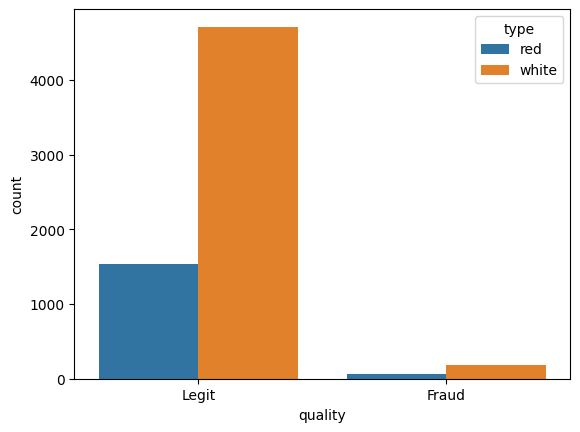

In [ ]:
sns.countplot(data=wine, x='quality', hue='type')

## 1.6: Create a heatmap that shows the correlation between all the columns of the `wine` DataFrame

>- Hint: Recall the `sns.heatmap()` function
>- Round the correlations to two decimals
>- When entering data to check solutions, use the format, `0.XX` to enter your data (e.g., 0.23, -0.44, etc)

In [ ]:

plt.figure(figsize=(10,8))


sns.heatmap(round(wine.corr(),2),


SyntaxError: incomplete input (<ipython-input-13-10f2c0680d50>, line 4)

## 1.7: Data Preparation

For this project, the target variable is `quality` but as we have explored in prior problems, `quality` has string values of "Legit" and "Fraud". Many machine learning algorithims require the features and target variables to be numeric, not text, so a common component of the `Data Preparation` phase in CRISP-DM is to convert text values to numerically coded values.

### One-Hot Encoding
Common techniques for this include `One-Hot Encoding` where we convert the text values to 0's and 1's where the goal of the prediction (in this case "Fraud") will get coded 1 and the other category will get coded 0.

In Python, there are several methods we can use to easily create new features based on `One-Hot Encoding`:
1. `pandas`: `map()`, `apply()`, `applymap()`
>- We can use `map()` to quickly tansform a binary text column to a series of 0's and 1's with:
``` df['numericTarget'] = df['target'].map({'textvalue1': 0 'textvalue2': 1}) ```

2. `scikit-learn`: `OneHotEncoder`

>- We will learn about using `sklearn.prerpossing` including the `OneHotEncorder` in another lesson

---
In the next cell, create a new column called "Fraud" which will be a One-Hot encoded column for the "quality" column with "Legit" coded as `0` and "Fraud" coded as `1`.

In [ ]:
wine['Fraud'] = wine['quality'].map({'Legit': 0, 'Fraud': 1})

## 1.8: Data Preparation, Dummy Coding

In our dataset, we had one categorical attribute that you should have explored in problem 1.5. Because the values of that column are text, many machine learning algorithms will not be able to use that column in analysis.

In python, another way to handle categorical features is to use `pandas` `get_dummies()` method: `pd.get_dummies(df['feature'])`

>- [pandas get_dummies doc](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)


In the next code cell, create dummy columns for the `type` column.

>- Set the prefix parameter to 'type' so that it is easy to see the encoded columns
>- It's also nice to use an underscore separator so check out the parameter to set a separator
>- You will then need to concatenate the resulting dummy columns to the `wine` dataframe. Review the `concat()` method for help in doing this.


In [ ]:
wine2 = pd.get_dummies(wine['type'], prefix='type', prefix_sep = '_')

wine = pd.concat([wine, wine2], axis=1)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud,type_red,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red,0,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red,0,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red,0,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red,0,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white,0,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white,0,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white,0,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white,0,0,1


## 1.9: Data Preparation

Now that we have added several new variables to the `wine` dataframe, we need to drop the original columns.

In the next code cell, drop the `quality` and `type` columns.

In [ ]:
wine = wine.drop('quality', axis=1)

In [ ]:
wine = wine.drop('type', axis=1)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Fraud,type_red,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,0,1


## 1.10: What feature(s) have the strongest correlation with the target variable?

After creating the "Fraud" column you should be able to calculate correlations with the other variables. In the next cell, show the correlations of the features with the target variable, "Fraud".
>- Show the correlations in descending order
>- Round to two decimals
>- When entering data to check solutions, use the format, `0.XX` to enter your data (e.g., 0.23, -0.44, etc)

In [ ]:
corrdf = round(wine.corr()['Fraud'],2).sort_values(ascending=False)
corrdf

Fraud                   1.00
volatile acidity        0.15
chlorides               0.03
fixed acidity           0.02
density                 0.02
pH                      0.02
type_red                0.00
type_white             -0.00
sulphates              -0.03
total sulfur dioxide   -0.04
residual sugar         -0.05
alcohol                -0.05
citric acid            -0.06
free sulfur dioxide    -0.09
Name: Fraud, dtype: float64

## 1.11: Create a bar plot of the correlation values to fraudulent wine

In the next cell, create a bar plot of the correlations to fraudulent wine.
>- Use: [p1.9 Bar Plot](https://drive.google.com/file/d/1H--14epSjn2o4VKZmdZ_gxeBeisD-DcY/view?usp=sharing) image file and replicate it for this problem

<function matplotlib.pyplot.show(close=None, block=None)>

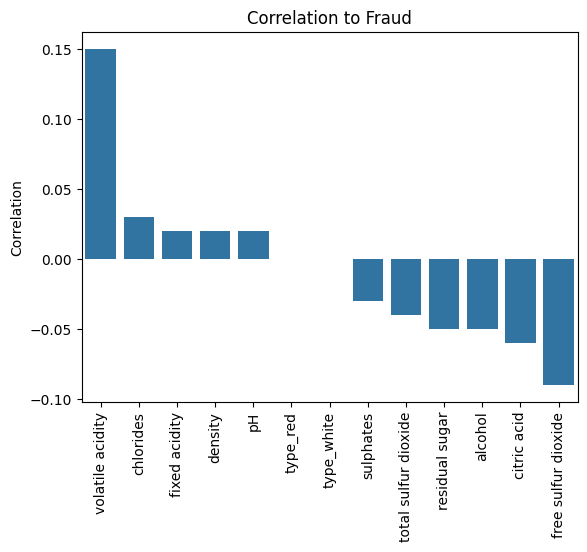

In [ ]:
sns.barplot(data=corrdf.drop('Fraud'))

plt.title('Correlation to Fraud')
plt.xticks(rotation=90)
plt.ylabel('Correlation')

plt.show

## 1.12: Scatterplot of two Highest Correlations

Create a scatterplot showing the features with the two highest absolute correlations on the x and y axis and the target variable as the groupings (hue).

>- Use this as your guide to creating your scatterplot: [p1.12 Scatter Plot](https://drive.google.com/file/d/1-7XXA0wNVp4dAIqiaskjWbQOMLfM8nhP/view?usp=sharing)

Does it look like we can separate the classes with these two variables?

In [ ]:
x= wine['volatile acidity']

# Section 2: Building a `SupportVectorMachine` Model

In this section the problems step you through creating a support vector classifier model.
>- Note 1: at this point in the class we are going to build our model on the full dataset. Later in the course we learn about cross validation and training and test datasets.
>- Note 2: we are also going to assume we can use a linear kernal to separate the classes but in reality we will need to do a grid search using `GridSearchSV` to find the best hyper parameters for the model


## 2.1: Create feature and target variables
In the next code cell:
>- Define `X` as your features
>- Define `y` as your target
>- Show the first 5 records of your features


In [ ]:
from sklearn.svm import SVC

y = wine['Fraud']
X = wine.drop('Fraud', axis = 1)

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0


## 2.2: Standardize The Feature Set

In many data mining projects, we will need to standardize or normalize the feature set. This ensures that features with vastly different scales are treated the same numerically by our models and provides a more accurate way to compare feature importance metrics.

`scikit-learn` makes the process of standardizing our features easy. We just need to import `StandardScaler` from `sklean.preprocessing`

See [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for more info and some examples.

---

In the next cell:
1. Create a `StandardScaler()` object with the name, `scaler`
2. Call `fit_transform(X)` on the scaler object and store the results in a variable named, `scaled_X`

Note: We will revisit data transformations throughout the course.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaled_X = scaler.fit_transform(X)

scaled_X

array([[ 0.14247327,  2.18883292, -2.19283252, ..., -0.91546416,
         1.75018984, -1.75018984],
       [ 0.45103572,  3.28223494, -2.19283252, ..., -0.58006813,
         1.75018984, -1.75018984],
       [ 0.45103572,  2.55330026, -1.91755268, ..., -0.58006813,
         1.75018984, -1.75018984],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.91546416,
        -0.57136659,  0.57136659],
       [-1.32319841, -0.30169391, -0.12823371, ...,  1.9354021 ,
        -0.57136659,  0.57136659],
       [-0.93749534, -0.78765037,  0.42232597, ...,  1.09691202,
        -0.57136659,  0.57136659]])

## 2.3: Fit the model

In the next cell, fit a support vector classifier model using the `scaled_X` and `y` data.

At first, lets just fit a 'linear' kernel with a C=1. In later lessons we will learn how to use `GridSearchCV` to find optimal hyper parameters.

Pass the following parameter value, `class_weight='balanced'` which helps alleviate the issue of unbalanced classes (see the results from problem 1.3 as a reminder of this.

>- See [SVC doc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for more info
>- class_weight: dict or balanced default=None

>>- Set the parameter C of class i to class_weight[i]C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes \* np.bincount(y))

In [ ]:
svc_model = SVC(kernel='linear', C = 1, class_weight = 'balanced')

svc_model.fit(scaled_X,y)

SVC(C=1, class_weight='balanced', kernel='linear')

## 2.4: Support Vectors

In the next cell:

>- Create a dataframe to store the support vectors and their target values

How many total support vectors are there in the dataframe?



In [ ]:
supp_vecs = svc_model.support_vectors_

svdf = pd.DataFrame(supp_vecs, columns=X.columns)

svtv = y[svc_model.support_]

svdf.index = svtv

svdf.shape

(4339, 13)

## 2.5: Coefficients

Since we fit a linear kernel we can evaluate the coefficients of the model. Now, in reality, a linear kernel may not be the best to fit this data but for this exercise it will do. Note: using `GridSearchCV` would allow us to find the "best" kernel and other hyper parameters when we start discussing how to find the best model for a particular problem.

---

In the next code cell, create a DataFrame that will store the coefficients of our SVC model.
>- Round the coefficients to two decimals
>- Enter data in the format: `0.XX` or `-0.XX`

Data entry will have you input a sample of the coefficients in a table.

In [ ]:
coef = pd.DataFrame(index = X.columns, data = svc_model.coef_[0], columns = ['Coeff'])

coef = round(coef.sort_values(by = 'Coeff', ascending=False),2)

coef

,Coeff
volatile acidity,0.76
type_white,0.68
density,0.51
fixed acidity,0.19
pH,0.11
chlorides,0.07
citric acid,-0.03
sulphates,-0.09
total sulfur dioxide,-0.14
alcohol,-0.28


## 2.6: Coefficient Interpretation

Based on the linear kernel model and the coefficients placed on the feature variables, what two features appear to help predict a fraudulent wine the best?

---

# Further Model Building

This lesson and exercise was designed to provide an introduction to support vector machines. We assumed some criteria (e.g., linear kernel, values of C, etc) in order to build models and interpret the results. In practice, there is much more to do to find the "best" models for a particular problem.

As we progress in our understanding of model building, we will begin to learn about topics such as cross validation, hyperparameter tuning, and model evaluation metrics.